### 1. 라이브러리 참조

In [2]:
from hossam import load_data
from os import path, mkdir
import folium

### #02. 지도 표현하기

#### 1. 지도 객체 생성

지도의 중심이 되는 위도와 경도를 설정

In [3]:
MY_PLACE = [37.4935982, 127.0327129] 

#### 2. 지도 불러오기

In [4]:
map_osm1 = folium.Map(location=MY_PLACE, zoom_start=17)

if not path.exists('output'):
    mkdir('output')

map_osm1.save('output/map_osm1.html')

#### 3. 지도 객체에 마커 추가

1) 일반 마커

아이콘 색상값 종류

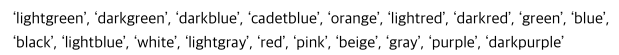

In [5]:
map_osm2 = folium.Map(location=MY_PLACE, zoom_start=17)

my_marker = folium.Marker(location=MY_PLACE,
                          popup='아이티윌 교육센터',
                          icon=folium.Icon(color='darkred'))
my_marker.add_to(map_osm2)

if not path.exists('output'):
    mkdir('output')
map_osm2.save('output/map_osm2.html')

2) 사용자 지정 아이콘, HTML 팝업

In [6]:
map_osm3 = folium.Map (location=MY_PLACE, zoom_start=17)

popup_html = folium.Popup("<div style='white-space: nowrap'><h3>아이티윌 교육센터</h3><img src='https://www.itwill.co.kr/css/wvtex/img/wvUser/logo.png' width='100%'><br/><p>tel: <a href='tel:02-6255-8002'>02-6255-8002</a></p><p>서울특별시 강남구 역삼로 120 2층 (역삼동, 성보역삼빌딩)</p></div>",parse_html=False)

icon_img = folium.features.CustomIcon('https://data.hossam.kr/favicon.png', icon_size=(50,50))

custom_marker = folium.Marker(MY_PLACE,
                              popup=popup_html,
                              icon=icon_img)
custom_marker.add_to(map_osm3)

if not path.exists('output'):
    mkdir('output')
map_osm3.save('output/map_osm3.html')

3) 원형 마커(범위 지정)

In [7]:
map_osm4 =folium.Map(location=MY_PLACE, zoom_start=17)

my_marker = folium.Marker(MY_PLACE, icon=folium.Icon(color='orange'))

circle_marker = folium.CircleMarker(location=MY_PLACE,
                                    radius=100,
                                    color='#3186cc',
                                    fill_color='#3186cc')
circle_marker.add_to(map_osm4)
my_marker.add_to(map_osm4)

if not path.exists('output'):
    mkdir('output')
    
map_osm4.save('output/map_osm4.html')


### #03. (예제) 서울의 고등학교 분포 확인하기
1) 데이터 준비하기

전국 초,중,고 학교 위치 데이터(데이터 로드에 다소 시간이 소요됨)

In [8]:
origin = load_data('schools')
origin

[data] https://data.hossam.kr/data/lab07/schools.xlsx
[desc] 전국 초,중,고 학교 위치 데이터 (출처: 공공데이터 포털)
[!] Cannot read metadata


,학교ID,학교명,학교급구분,설립일자,설립형태,본교분교구분,운영상태,소재지지번주소,소재지도로명주소,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,생성일자,변경일자,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,B000004204,한울초등학교,초등학교,2008-09-01,공립,본교,운영,경기도 화성시 향남읍 행정리 442,경기도 화성시 향남읍 행정중앙1로 25 . 한울초등학교 (향남읍),7530000,경기도교육청,7679000,경기도화성오산교육지원청,2013-11-29,2022-10-06,37.126961,126.917854,2023-03-22,C738100,청주대학교 지방교육재정연구원
1,B000011476,수원농생명과학고등학교,고등학교,1936-07-01,공립,본교,운영,경기도 수원시 장안구 영화동 109,경기도 수원시 장안구 광교산로 13 (영화동.농생명과학고등학교),7530000,경기도교육청,7541000,경기도수원교육지원청,2013-11-29,2022-10-06,37.295154,127.019450,2023-03-22,C738100,청주대학교 지방교육재정연구원
2,B000009647,녹양중학교,중학교,2008-03-01,공립,본교,운영,경기도 의정부시 녹양동 191-5,경기도 의정부시 체육로 187 . 녹양중학교 (녹양동),7530000,경기도교육청,7561000,경기도의정부교육지원청,2013-11-29,2022-10-06,37.761864,127.028084,2023-03-22,C738100,청주대학교 지방교육재정연구원
3,B000005955,초락초등학교,초등학교,1959-04-02,공립,본교,운영,충청남도 당진시 석문면 초락도리 210-3,충청남도 당진시 석문면 샛터말길 35 (석문면),8140000,충청남도교육청,8291000,충청남도당진교육지원청,2013-11-29,2022-10-06,36.993080,126.510472,2023-03-22,C738100,청주대학교 지방교육재정연구원
4,B000005385,상봉초등학교,초등학교,1946-09-01,공립,본교,운영,충청북도 청주시 흥덕구 오송읍 상봉리 242-1,충청북도 청주시 흥덕구 오송읍 상봉길 9 . 상봉초등학교 (오송읍),8000000,충청북도교육청,8011000,충청북도청주교육지원청,2013-11-29,2022-10-06,36.638251,127.286142,2023-03-22,C738100,청주대학교 지방교육재정연구원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11983,B000003371,대전옥계초등학교,초등학교,1982-12-09,공립,본교,운영,대전광역시 중구 옥계동 65,대전광역시 중구 모암로 35 (옥계동. 대전옥계초등학교),7430000,대전광역시교육청,7441000,대전광역시동부교육지원청,2013-11-29,2022-10-06,36.301199,127.449039,2023-03-22,C738100,청주대학교 지방교육재정연구원
11984,B000003345,성덕초등학교,초등학교,2011-03-11,공립,본교,운영,광주광역시 광산구 장덕동 1042,광주광역시 광산구 풍영로 313 . 성덕초등학교 (장덕동),7380000,광주광역시교육청,7401000,광주광역시서부교육지원청,2013-11-29,2022-10-06,35.199148,126.814301,2023-03-22,C738100,청주대학교 지방교육재정연구원
11985,B000005441,이월초등학교,초등학교,1920-04-01,공립,본교,운영,충청북도 진천군 이월면 송림리 667,충청북도 진천군 이월면 송림6길 26 . 이월초등학교 (이월면),8000000,충청북도교육청,8081000,충청북도진천교육지원청,2013-11-29,2022-10-06,36.931076,127.431922,2023-03-22,C738100,청주대학교 지방교육재정연구원
11986,B000009875,해안중학교,중학교,1979-03-08,공립,본교,운영,강원도 양구군 해안면 현리 143,강원도 양구군 해안면 펀치볼로 1279 (해안면),7800000,강원도교육청,7951000,강원도양구교육지원청,2013-11-29,2022-10-06,38.283771,128.135686,2023-03-22,C738100,청주대학교 지방교육재정연구원


2) 데이터 전처리
    1. 사용할 필드만 추출

In [9]:
df = origin.filter(['학교명','학교급구분','소재지도로명주소','위도','경도'])
df

,학교명,학교급구분,소재지도로명주소,위도,경도
0,한울초등학교,초등학교,경기도 화성시 향남읍 행정중앙1로 25 . 한울초등학교 (향남읍),37.126961,126.917854
1,수원농생명과학고등학교,고등학교,경기도 수원시 장안구 광교산로 13 (영화동.농생명과학고등학교),37.295154,127.019450
2,녹양중학교,중학교,경기도 의정부시 체육로 187 . 녹양중학교 (녹양동),37.761864,127.028084
3,초락초등학교,초등학교,충청남도 당진시 석문면 샛터말길 35 (석문면),36.993080,126.510472
4,상봉초등학교,초등학교,충청북도 청주시 흥덕구 오송읍 상봉길 9 . 상봉초등학교 (오송읍),36.638251,127.286142
...,...,...,...,...,...
11983,대전옥계초등학교,초등학교,대전광역시 중구 모암로 35 (옥계동. 대전옥계초등학교),36.301199,127.449039
11984,성덕초등학교,초등학교,광주광역시 광산구 풍영로 313 . 성덕초등학교 (장덕동),35.199148,126.814301
11985,이월초등학교,초등학교,충청북도 진천군 이월면 송림6길 26 . 이월초등학교 (이월면),36.931076,127.431922
11986,해안중학교,중학교,강원도 양구군 해안면 펀치볼로 1279 (해안면),38.283771,128.135686


In [10]:
df_test = df.copy()
df_test

,학교명,학교급구분,소재지도로명주소,위도,경도
0,한울초등학교,초등학교,경기도 화성시 향남읍 행정중앙1로 25 . 한울초등학교 (향남읍),37.126961,126.917854
1,수원농생명과학고등학교,고등학교,경기도 수원시 장안구 광교산로 13 (영화동.농생명과학고등학교),37.295154,127.019450
2,녹양중학교,중학교,경기도 의정부시 체육로 187 . 녹양중학교 (녹양동),37.761864,127.028084
3,초락초등학교,초등학교,충청남도 당진시 석문면 샛터말길 35 (석문면),36.993080,126.510472
4,상봉초등학교,초등학교,충청북도 청주시 흥덕구 오송읍 상봉길 9 . 상봉초등학교 (오송읍),36.638251,127.286142
...,...,...,...,...,...
11983,대전옥계초등학교,초등학교,대전광역시 중구 모암로 35 (옥계동. 대전옥계초등학교),36.301199,127.449039
11984,성덕초등학교,초등학교,광주광역시 광산구 풍영로 313 . 성덕초등학교 (장덕동),35.199148,126.814301
11985,이월초등학교,초등학교,충청북도 진천군 이월면 송림6길 26 . 이월초등학교 (이월면),36.931076,127.431922
11986,해안중학교,중학교,강원도 양구군 해안면 펀치볼로 1279 (해안면),38.283771,128.135686


2) 서울시의 고등학교만 추출
- 학교급구분 필드값이 고등학교이고, 소재지도로명주소에 "서울" 이라는 단어가 포함된 경우

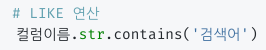

In [11]:
df2 = df.query("학교급구분 == '고등학교' and 소재지도로명주소.str.contains('서울')")
df2

,학교명,학교급구분,소재지도로명주소,위도,경도
6,경기고등학교,고등학교,서울특별시 강남구 영동대로 643 . 경기고등학교 (삼성동),37.517565,127.056076
89,대일관광고등학교,고등학교,서울특별시 양천구 신정이펜1로 11 . 대일관광고등학교 (신정동. 대일관광고등학교),37.511414,126.834907
97,한광고등학교,고등학교,서울특별시 강서구 등촌로13길 110 (화곡동),37.538844,126.857922
98,상일미디어고등학교,고등학교,서울특별시 강동구 천호대로219길 61 . 상일미디어고등학교 (상일동),37.549470,127.170767
118,선정국제관광고등학교,고등학교,서울특별시 은평구 서오릉로20길 19 . 선정국제관광고등학교 (갈현동),37.618705,126.909032
...,...,...,...,...,...
11429,성수고등학교,고등학교,서울특별시 성동구 서울숲길 18 . 성수고등학교 (성수동1가),37.547342,127.038253
11451,대진여자고등학교,고등학교,서울특별시 노원구 공릉로 438 . 대진여자고등학교 (중계동),37.646174,127.067197
11564,도선고등학교,고등학교,서울특별시 성동구 마장로 156 (하왕십리동),37.566844,127.026996
11600,금호고등학교,고등학교,서울특별시 성동구 금호로 118 (금호동1가. 금호고등학교),37.553621,127.023434


3) 데이터 시각화

In [12]:
map_osm5 = folium.Map(location=MY_PLACE, zoom_start=12)

html = "<font color = 'green' style = 'white-space: nowrap'><b>%s</b></font>"

for i in df2.index:
    name = df2.loc[i,'학교명']
    lat = df2.loc[i,'위도']
    lng = df2.loc[i,'경도']

    popup_html = folium.Popup(html % name, parse_html = False)
    marker = folium.Marker([lat,lng], popup=popup_html)
    marker.add_to(map_osm5)
    
if not path.exists('output'):
    mkdir('output')
map_osm5.save('output/map_osm5.html')